Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-199.059,-208.691,6.26897e-58
2,140.151,4.0,-196.477,-206.094,8.41438e-57
3,140.302,4.0,-193.922,-203.526,1.0977e-55
4,140.452,4.0,-191.397,-200.986,1.39183e-54
5,140.603,4.0,-188.899,-198.474,1.71524e-53
6,140.754,4.0,-186.43,-195.991,2.05448e-52
7,140.905,4.0,-183.99,-193.536,2.39176e-51
8,141.055,4.0,-181.577,-191.11,2.70626e-50
9,141.206,4.0,-179.194,-188.713,2.97618e-49


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,153.417,6.01005,-69.4624,-78.0445,0.343735
2,151.759,10.593,-70.8327,-79.5202,0.078583
3,156.281,5.76884,-71.7818,-80.1981,0.0398939
4,154.925,10.0302,-70.0704,-78.5627,0.204717
5,154.623,6.97487,-68.6406,-77.1504,0.840448
6,155.98,9.54774,-70.0498,-78.4826,0.221804
7,154.925,9.46734,-69.5986,-78.0909,0.328147
8,151.91,11.2362,-71.3814,-80.0589,0.0458515
9,153.568,7.45729,-68.4294,-77.0023,0.974615


### Snippet 4.23

Density of sigma

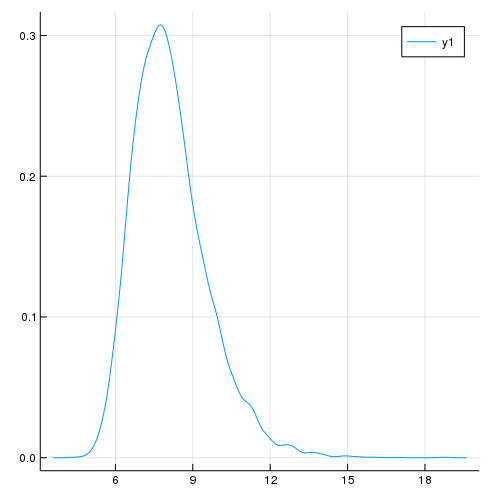

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*